> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

That the degrees of the nodes in a random network are all close to the average degree, while in real-world networks, the degrees of the nodes are often very different from each other.

> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.

1. Subcritical regime: $\langle k \rangle < 1$
2. Critical point: $\langle k \rangle = 1$
3. Supercritical regime: $1 < \langle k \rangle < \ln N$
4. Connected regime: $\langle k \rangle > \ln N$

> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?

Because in random networks $C(k)$ is supposed to be independent of $k$.

In [2]:
import networkx as nx

G1 = nx.watts_strogatz_graph(500, 4, 0)
G2 = nx.watts_strogatz_graph(500, 4, 0.1)
G3 = nx.watts_strogatz_graph(500, 4, 1)

# Calculate the average shortest path length for each graph
l1 = nx.average_shortest_path_length(G1)
l2 = nx.average_shortest_path_length(G2)
l3 = nx.average_shortest_path_length(G3)

print("Average shortest path length for G1: {}".format(l1))
print("Average shortest path length for G2: {}".format(l2))
print("Average shortest path length for G3: {}".format(l3))

Average shortest path length for G1: 62.875751503006015
Average shortest path length for G2: 7.944320641282565
Average shortest path length for G3: 4.760256513026052


In [3]:
import numpy as np

p_list = [0, 0.01, 0.03, 0.05, 0.1, 0.2]

avg_d_list = []
std_dev_list = []

for p in p_list:
    avg_d = []
    for i in range(50):
        G = nx.watts_strogatz_graph(500, 4, p)
        avg_d.append(nx.average_shortest_path_length(G))
    
    avg_d_list.append(sum(avg_d) / len(avg_d))
    std_dev_list.append(np.std(avg_d))

KeyboardInterrupt: 

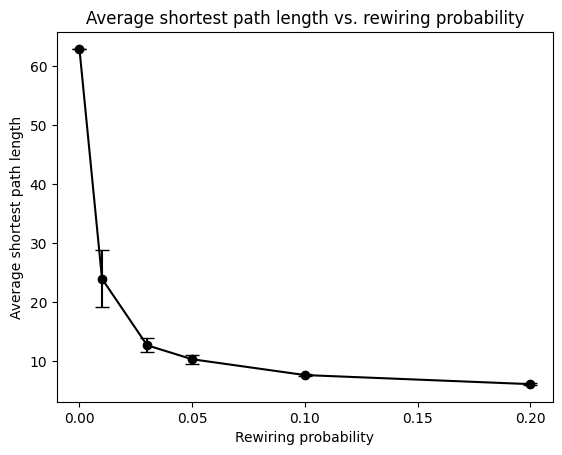

In [16]:
import matplotlib.pyplot as plt

# plot the average shortest path length vs. rewiring probability with error bars and black markers and connecting lines
plt.errorbar(p_list, avg_d_list, yerr=std_dev_list, fmt='o', color='black', linestyle='-', capsize=5)
plt.xticks([0, 0.05, 0.1, 0.15, 0.2])
plt.xlabel('Rewiring probability')
plt.ylabel('Average shortest path length')
plt.title('Average shortest path length vs. rewiring probability')
# make nodes black
plt.gca().set_prop_cycle(None)
plt.show()

The figure above shows the average shortest path length in Watts-Strogatz networks as a function of the rewiring probability $p$. The average shortest path length decreases as $p$ increases, which is expected since the network becomes more random and the average degree increases. The graph also shows the standard deviation of the shortest path lengths for each value of $p$. The standard deviation is highest for $p=0.01$, which is caused by the fact that the network only has a few random connections, which makes the shortest path lengths vary a lot. As $p$ increases, the standard deviation decreases, which is expected since the network becomes more random and the shortest path lengths become more similar.

> * What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 4.7 to answer this one).

1. $\gamma < 2$: Anomalous regime. No large network can exist because the $k$<sub>max</sub> grows faster than $N$.
2. $\gamma = 2$: Scale-free regime. The network is scale-free and the average degree grows logarithmically with the number of nodes. It's also called $Ultra-Small World$.
3. $\gamma > 3$: Random regime. The network is not scale-free and the average degree grows linearly with the number of nodes. It's also called $Small World$.

> * What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.

1. Sublinear preferential attachment: The network is not scale-free and the degree distribution is stretched exponential.
2. Linear preferential attachment: The network is scale-free and the degree distribution is a power-law.
3. Superlinear preferential attachment: The network is not scale-free and the degree distribution is m winner-takes-all.


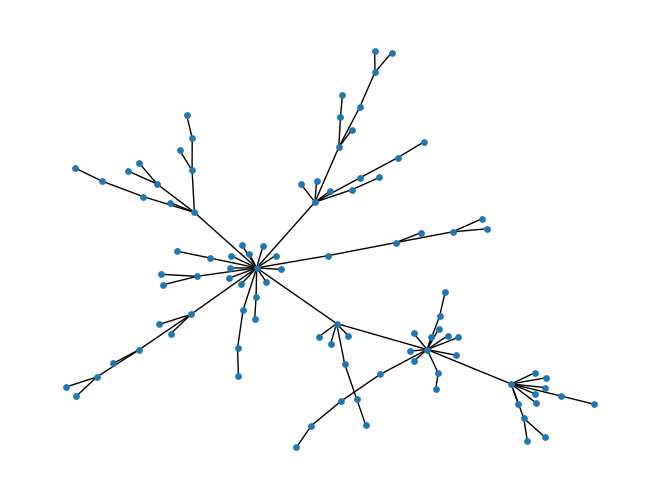

In [77]:
G_ba = nx.Graph()
G_ba.add_node(0)
G_ba.add_node(1)
G_ba.add_edge(0, 1)

def add_node(G):
    new_node = G.number_of_nodes()
    G.add_node(new_node)
    weighted_nodes = [node for node in G.nodes() for _ in range(G.degree(node))]
    target = np.random.choice(weighted_nodes, size=1)[0]
    G.add_edge(new_node, target)
    return G

for i in range(98):
    G_ba = add_node(G_ba)

#plot with 100 nodes
nx.draw(G_ba, node_size=15)

In [78]:
for i in range(4900):
    G_ba = add_node(G_ba)

#plot with 5000 nodes
# nx.draw(G_ba, node_size=15)

In [79]:
#min degree
min_degree = min([G_ba.degree(node) for node in G_ba.nodes()])
print("Minimum degree: {}".format(min_degree))

#max degree
max_degree = max([G_ba.degree(node) for node in G_ba.nodes()])
print("Maximum degree: {}".format(max_degree))

Minimum degree: 1
Maximum degree: 124


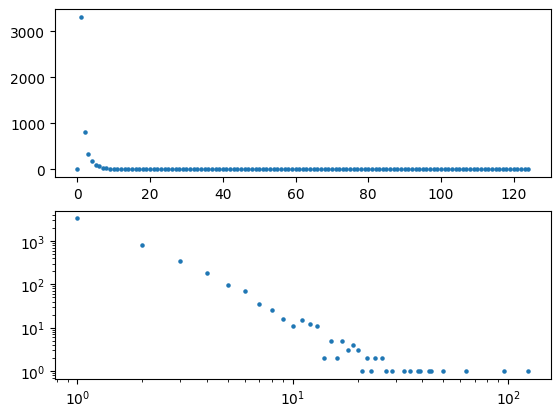

In [80]:
#degree distribution
dist = np.histogram([G_ba.degree(node) for node in G_ba.nodes()], bins=range(0, max_degree + 2))

import matplotlib.pyplot as plt

fig, (lin, log) = plt.subplots(2, 1)

lin.scatter(dist[1][:-1], dist[0], s=5)

log.scatter(dist[1][:-1], dist[0], s=5)
log.set_yscale('log')
log.set_xscale('log')

In [81]:
random_node = np.random.choice(G_ba.nodes())

neighbors = list(G_ba.neighbors(random_node))
avg_degree = sum([G_ba.degree(node) for node in neighbors]) / len(neighbors)

cnt = 0

for i in range(1000):
    random_node = np.random.choice(G_ba.nodes())
    neighbors = list(G_ba.neighbors(random_node))
    avg_degree = sum([G_ba.degree(node) for node in neighbors]) / len(neighbors)
    if avg_degree > G_ba.degree(random_node):
        cnt += 1

print("Fraction of nodes whose neighbors have a higher average degree: {}".format(cnt / 1000))

Fraction of nodes whose neighbors have a higher average degree: 0.856


In [82]:
#generate a network with 5000 nodes and a degree exponent of 2

#create degree sequence
degree_sequence = [int(x) for x in nx.utils.powerlaw_sequence(5000, 2)]
if sum(degree_sequence) % 2 != 0:
    degree_sequence[-1] += 1

F_BA = nx.configuration_model(degree_sequence)

cnt = 0

for i in range(1000):
    random_node = np.random.choice(F.nodes())
    neighbors = list(F_BA.neighbors(random_node))
    avg_degree = sum([F_BA.degree(node) for node in neighbors]) / len(neighbors)
    if avg_degree > F_BA.degree(random_node):
        cnt += 1

print("Fraction of nodes whose neighbors have a higher average degree: {}".format(cnt / 1000))

Fraction of nodes whose neighbors have a higher average degree: 0.944


In [105]:
F_CM = nx.configuration_model([G_ba.degree(node) for node in G_ba.nodes()])

cnt = 0

for i in range(1000):
    random_node = np.random.choice(F_CM.nodes())
    neighbors = list(F_CM.neighbors(random_node))
    avg_degree = sum([F_CM.degree(node) for node in neighbors]) / len(neighbors)
    if avg_degree > F_CM.degree(random_node):
        cnt += 1

print("Fraction of nodes whose neighbors have a higher average degree: {}".format(cnt / 1000))

Fraction of nodes whose neighbors have a higher average degree: 0.603


>       * Are there factors beyond the degree-distribution that could impact how frequently the friendship paradox is true? I might consider how network properties like assortativity, clustering, community-structure, etc potentially could impact things (it'sOK to search online and add references to your answer).

- Assortativity is closely related to the friendship paradox. In a network with a higher degree of assortativity the nodes with higher degrees are more likely to be connected with other nodes with higher degrees. This means that the friendship paradox is more likely to be true in assortative networks. In a network with a lower degree of assortativity the friendship paradox is less likely to be true. [1](https://doi.org/10.1007/s41109-019-0190-8)
- 

>       * How would you test more rigorously if the friendship-paradox is actually true equally often in **F-BA** and **F-CM**? (E.g. how would you run a statistical test to investigate ... or how would you put error-bars on your plots?)

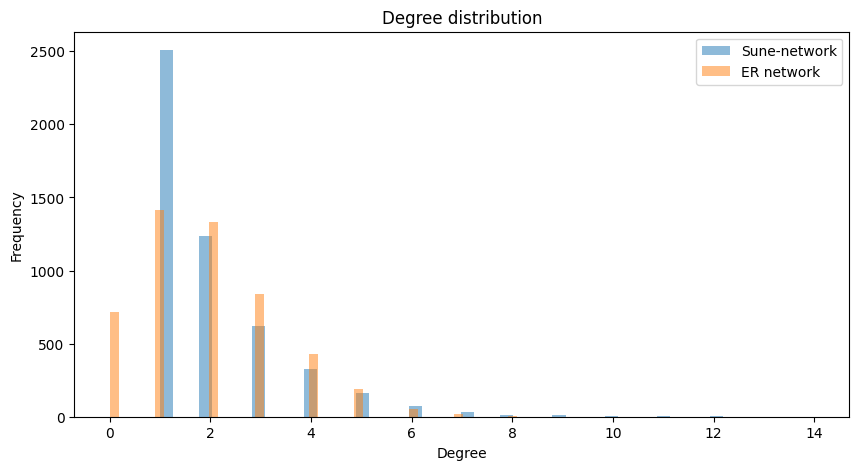

Number of connected components in Sune-network: 1
Number of connected components in ER network: 865


In [137]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Grow the Sune-network
def grow_sune_network(num_nodes):
    G = nx.Graph()
    G.add_node(0)  # Start with a single node

    for i in range(1, num_nodes):
        new_node = i
        existing_nodes = list(G.nodes)
        target_node = np.random.choice(existing_nodes)
        G.add_edge(new_node, target_node)

    return G

# Step 2: Generate an ER network with the same number of nodes and links as the Sune-network
def generate_er_network(num_nodes, num_edges):
    p = num_edges / (num_nodes * (num_nodes - 1) / 2)
    ER = nx.erdos_renyi_graph(num_nodes, p)
    return ER

# Parameters
num_nodes = 5000

# Grow the Sune-network
sune_network = grow_sune_network(num_nodes)

# Calculate the number of edges in the Sune-network
num_edges_sune = sune_network.number_of_edges()

# Generate the ER network with the same number of nodes and edges
er_network = generate_er_network(num_nodes, num_edges_sune)

# Plot degree distributions
sune_degrees = [degree for node, degree in sune_network.degree()]
er_degrees = [degree for node, degree in er_network.degree()]

plt.figure( figsize=(10, 5))
plt.hist(sune_degrees, bins=50, alpha=0.5, label='Sune-network')
plt.hist(er_degrees, bins=50, alpha=0.5, label='ER network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree distribution')
plt.legend()
plt.show()

# Compare the number of connected components
num_components_sune = nx.number_connected_components(sune_network)
num_components_er = nx.number_connected_components(er_network)

print(f"Number of connected components in Sune-network: {num_components_sune}")
print(f"Number of connected components in ER network: {num_components_er}")




### Differences Between the ER Network and the Sune-network
1. **Degree Distribution**:
   - The **Sune-network** has a degree distribution that is more skewed, with a few nodes having a very high degree and many nodes having a low degree.
   - The **ER network** has a more uniform degree distribution, where most nodes have a degree close to the average.

2. **Number of Connected Components**:
   - The **Sune-network** forms a single connected component, meaning all nodes are part of one large network.
   - The **ER network** has many disconnected components, indicating that the network is more fragmented.

These differences highlight how the growth mechanism and connection probabilities significantly impact the network's structure and properties. The Sune-network's single connected component suggests a more robust and interconnected network, while the ER network's multiple components indicate a less cohesive structure.

Forrás: Beszélgetés a Copilottal. 2024. 09. 18.
(1) undefined. https://www.bing.com/images/blob?bcid=RF3Eez4pbYUHuhcxoNWLuD9SqbotqVT.PXM.